<a href="https://colab.research.google.com/github/somas1/CT/blob/main/NBA_PANDAS/NBA_Regular_Season_2018_19_Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nba Regular Season 2018-19 Data Challenge

Your task will be to take the dataset given, and create an analysis answering the following 10 questions. This project will again test your knowledge of pandas in order to find the answers needed given the data you are presented with.

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
nba = pd.read_csv('nbastats2018-2019.csv')
nba.head()

,Name,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,...,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
0,Alex Abrines,78,200,Oklahoma City Thunder,25,5455236,5.3,0.2,0.5,0.6,...,19.0,31,6.3,0.1,0.6,0.6,0.053,12.2,-3.4,-0.2
1,Quincy Acy,79,240,Phoenix Suns,28,213949,1.7,0.4,0.1,0.8,...,12.3,10,2.9,-0.1,0.0,-0.1,-0.022,9.2,-5.9,-0.1
2,Jaylen Adams,74,190,Atlanta Hawks,22,236854,3.2,0.1,0.4,1.9,...,12.6,34,7.6,-0.1,0.2,0.1,0.011,13.5,-4.4,-0.3
3,Steven Adams,84,265,Oklahoma City Thunder,25,24157304,13.9,1.0,1.5,1.6,...,33.4,80,18.5,5.1,4.0,9.1,0.163,16.4,2.7,3.2
4,Bam Adebayo,82,255,Miami Heat,21,2955840,8.9,0.8,0.9,2.2,...,23.3,82,17.9,3.4,3.4,6.8,0.171,15.8,3.0,2.4


# What was the average age of player in the league?

In [8]:
nba['Age'].mean().round(2)

25.9

# What player scored the most points?

In [39]:
nba.sort_values('Points', ascending=False)[['Name', 'Points']].head(1)

,Name,Points
202,James Harden,36.1


James Harden had a higher point value than any other player in the dataset at 36.1. This suggests the values in the dataset are averages for the season, not totals.

Since the values presented are most likely averages, I will avoid applying functions such as .mean() to the dataset to average values further.

# What player had the most blocks during the season? Was it a post player (F/C)?

In [56]:
most_blocks = nba.sort_values(by='Blocks', ascending=False)[['Name', 'Height', 'Points', 'Blocks', 'Rebounds', 'Assists', 'FGA']].head(1)
most_blocks

,Name,Height,Points,Blocks,Rebounds,Assists,FGA
476,Myles Turner,83,13.3,2.7,7.2,1.6,10.5


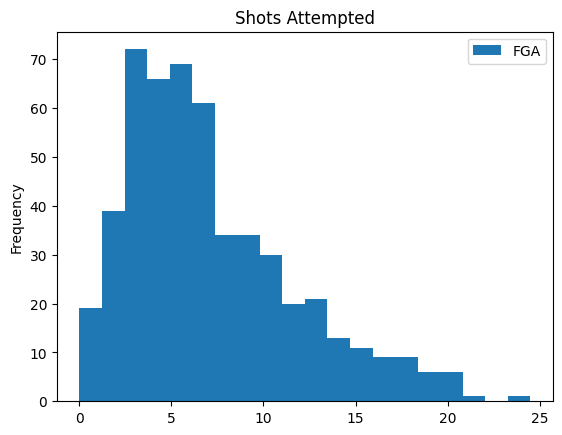

In [125]:
shot_attempts = nba.sort_values(by='FGA', ascending=False)[['Name','FGA']].set_index('Name')
shot_attempts.plot(kind='hist', bins=20, title='Shots Attempted').set_visible(True)

Myles Turner had the most blocks during the 2018-2019 season.

A post player plays with their back to the basket, which gives them the ability to block more shots than they can typically make.

He is 83 inches or 6'9 inches tall which suggests he's plays center. Center players are usually post players.

Someone with a high number of FGAs is likely to be a forward.

# Based on the regular season, who had the best chance to win a title given their win percentage?

# What player had the best 3-pt percentage?

# Who played the most minutes during the season

# What player given their player effiecency rating was the clutchest during the season?

# What team had the youngest roster?

# Who is the highest paid player during the seasion?

# At the end of a game, who WOULDN'T you want on the Free Throw Line?